In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Conv2D, Flatten, Reshape, Conv1D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

import data_processing
import feature_extraction

In [28]:
df = data_processing.read_all_users('Geolife_data')
df = data_processing.calculations(df)
df = data_processing.merge_classes(df)

[1/38] processing user User37
[2/38] processing user User30
[3/38] processing user User31
[4/38] processing user User36
[5/38] processing user User38
[6/38] processing user User2
[7/38] processing user User5
[8/38] processing user User4
[9/38] processing user User3
[10/38] processing user User25
[11/38] processing user User22
[12/38] processing user User14
[13/38] processing user User13
[14/38] processing user User12
[15/38] processing user User15
[16/38] processing user User23
[17/38] processing user User24
[18/38] processing user User33
[19/38] processing user User34
[20/38] processing user User35
[21/38] processing user User32
[22/38] processing user User8
[23/38] processing user User6
[24/38] processing user User1
[25/38] processing user User7
[26/38] processing user User9
[27/38] processing user User21
[28/38] processing user User26
[29/38] processing user User19
[30/38] processing user User10
[31/38] processing user User17
[32/38] processing user User28
[33/38] processing user Us

In [29]:
df

,lat,lon,alt,elapsed time,label,time,trajectory,user,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration
0,39.894178,116.318200,-777.0,39535.621296,train,2008-03-28 14:54:40,01020080328144824.plt,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39.894505,116.321132,-777.0,39535.621690,train,2008-03-28 14:55:14,01020080328144824.plt,33,0.252764,0.007434,34.0,NaN,81.728206,NaN,NaN,NaN,NaN
2,39.894953,116.326452,-777.0,39535.622373,train,2008-03-28 14:56:13,01020080328144824.plt,33,0.456583,0.007739,59.0,5.160437e-06,83.734582,2.006376e+00,3.934334e-02,3.400637e-02,NaN
3,39.894600,116.332542,-777.0,39535.623056,train,2008-03-28 14:57:12,01020080328144824.plt,33,0.521027,0.008831,59.0,1.851318e-05,94.318545,1.058396e+01,1.236873e-01,1.793892e-01,2.464116e-03
4,39.889622,116.337040,-777.0,39535.623738,train,2008-03-28 14:58:11,01020080328144824.plt,33,0.673539,0.011416,59.0,4.381261e-05,145.266086,5.094754e+01,2.264335e-01,8.635176e-01,1.159540e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,40.029320,116.411975,289.0,39781.103808,train,2008-11-29 02:29:29,17920081129015805.plt,36,0.023240,0.011620,2.0,-2.799201e-05,180.419823,2.068969e-01,4.817827e-03,-1.034485e-01,5.147249e-02
472,40.029111,116.411963,275.0,39781.103831,train,2008-11-29 02:29:31,17920081129015805.plt,36,0.023262,0.011631,2.0,5.456289e-06,182.517368,2.097545e+00,9.382246e-04,1.048773e+00,5.761106e-01
473,40.028904,116.411962,274.0,39781.103854,train,2008-11-29 02:29:33,17920081129015805.plt,36,0.023018,0.011509,2.0,-6.117035e-05,180.211944,2.305425e+00,1.063023e-02,-1.152712e+00,-1.100742e+00
474,40.028697,116.411961,274.0,39781.103877,train,2008-11-29 02:29:35,17920081129015805.plt,36,0.023018,0.011509,2.0,-1.147129e-13,180.211944,6.431768e-07,1.993490e-11,3.215884e-07,5.763563e-01


In [30]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df

,lat,lon,alt,elapsed time,label,time,trajectory,user,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration
3,39.894600,116.332542,-777.0,39535.623056,train,2008-03-28 14:57:12,01020080328144824.plt,33,0.521027,0.008831,59.0,1.851318e-05,94.318545,1.058396e+01,1.236873e-01,1.793892e-01,2.464116e-03
4,39.889622,116.337040,-777.0,39535.623738,train,2008-03-28 14:58:11,01020080328144824.plt,33,0.673539,0.011416,59.0,4.381261e-05,145.266086,5.094754e+01,2.264335e-01,8.635176e-01,1.159540e-02
5,39.882090,116.338353,-777.0,39535.624421,train,2008-03-28 14:59:10,01020080328144824.plt,33,0.844980,0.014322,59.0,4.925049e-05,172.380803,2.711472e+01,2.028936e-01,4.595715e-01,-6.846546e-03
6,39.873873,116.338455,-777.0,39535.625116,train,2008-03-28 15:00:10,01020080328144824.plt,33,0.913730,0.015229,60.0,1.511915e-05,179.454178,7.073376e+00,5.956785e-02,1.178896e-01,-5.694698e-03
7,39.865182,116.338058,-777.0,39535.625799,train,2008-03-28 15:01:09,01020080328144824.plt,33,0.966989,0.016390,59.0,1.967467e-05,182.008052,2.553874e+00,7.082555e-02,4.328599e-02,-1.264468e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,40.029320,116.411975,289.0,39781.103808,train,2008-11-29 02:29:29,17920081129015805.plt,36,0.023240,0.011620,2.0,-2.799201e-05,180.419823,2.068969e-01,4.817827e-03,-1.034485e-01,5.147249e-02
472,40.029111,116.411963,275.0,39781.103831,train,2008-11-29 02:29:31,17920081129015805.plt,36,0.023262,0.011631,2.0,5.456289e-06,182.517368,2.097545e+00,9.382246e-04,1.048773e+00,5.761106e-01
473,40.028904,116.411962,274.0,39781.103854,train,2008-11-29 02:29:33,17920081129015805.plt,36,0.023018,0.011509,2.0,-6.117035e-05,180.211944,2.305425e+00,1.063023e-02,-1.152712e+00,-1.100742e+00
474,40.028697,116.411961,274.0,39781.103877,train,2008-11-29 02:29:35,17920081129015805.plt,36,0.023018,0.011509,2.0,-1.147129e-13,180.211944,6.431768e-07,1.993490e-11,3.215884e-07,5.763563e-01


Select features for time-series analysis

In [31]:
time_series_features = ['speed', 'acceleration', 'angular_acceleration']

Normalize Time-Series features

In [32]:
scaler = StandardScaler()
df[time_series_features] = scaler.fit_transform(df[time_series_features])
df

,lat,lon,alt,elapsed time,label,time,trajectory,user,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration
3,39.894600,116.332542,-777.0,39535.623056,train,2008-03-28 14:57:12,01020080328144824.plt,33,0.521027,0.488655,59.0,0.000625,94.318545,1.058396e+01,1.236873e-01,1.793892e-01,-0.007288
4,39.889622,116.337040,-777.0,39535.623738,train,2008-03-28 14:58:11,01020080328144824.plt,33,0.673539,0.843646,59.0,0.014639,145.266086,5.094754e+01,2.264335e-01,8.635176e-01,-0.007152
5,39.882090,116.338353,-777.0,39535.624421,train,2008-03-28 14:59:10,01020080328144824.plt,33,0.844980,1.242698,59.0,0.017651,172.380803,2.711472e+01,2.028936e-01,4.595715e-01,-0.007426
6,39.873873,116.338455,-777.0,39535.625116,train,2008-03-28 15:00:10,01020080328144824.plt,33,0.913730,1.367277,60.0,-0.001255,179.454178,7.073376e+00,5.956785e-02,1.178896e-01,-0.007409
7,39.865182,116.338058,-777.0,39535.625799,train,2008-03-28 15:01:09,01020080328144824.plt,33,0.966989,1.526691,59.0,0.001269,182.008052,2.553874e+00,7.082555e-02,4.328599e-02,-0.007343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,40.029320,116.411975,289.0,39781.103808,train,2008-11-29 02:29:29,17920081129015805.plt,36,0.023240,0.871699,2.0,-0.025135,180.419823,2.068969e-01,4.817827e-03,-1.034485e-01,-0.006557
472,40.029111,116.411963,275.0,39781.103831,train,2008-11-29 02:29:31,17920081129015805.plt,36,0.023262,0.873198,2.0,-0.006607,182.517368,2.097545e+00,9.382246e-04,1.048773e+00,0.001264
473,40.028904,116.411962,274.0,39781.103854,train,2008-11-29 02:29:33,17920081129015805.plt,36,0.023018,0.856397,2.0,-0.043513,180.211944,2.305425e+00,1.063023e-02,-1.152712e+00,-0.023734
474,40.028697,116.411961,274.0,39781.103877,train,2008-11-29 02:29:35,17920081129015805.plt,36,0.023018,0.856397,2.0,-0.009630,180.211944,6.431768e-07,1.993490e-11,3.215884e-07,0.001268


Encode Labels

In [33]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

Group by trajectory to create sequence

In [34]:
X_sequences = []
y_sequences = []

for _, group in df.groupby('trajectory'):
    X_sequences.append(group[time_series_features].values)  # Raw sequences
    y_sequences.append(group['label'].iloc[0])  # Assign one label per trajectory

Plot the trajectory length

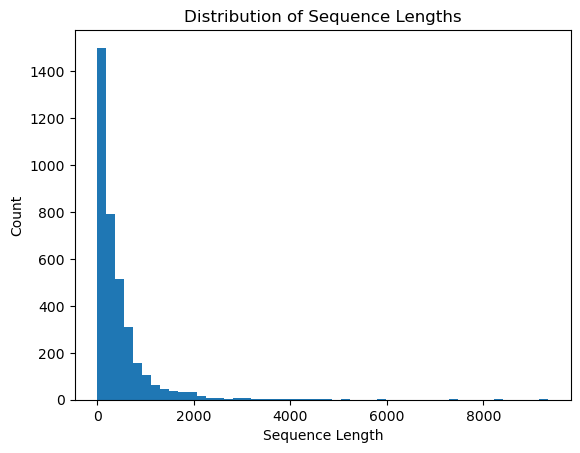

In [35]:
import matplotlib.pyplot as plt
import numpy as np

seq_lengths = [len(seq) for seq in X_sequences]
plt.hist(seq_lengths, bins=50)
plt.xlabel("Sequence Length")
plt.ylabel("Count")
plt.title("Distribution of Sequence Lengths")
plt.show()

Set max lenght because of imbalances trajectory lengths

Create Rolling Window

In [58]:
import numpy as np
from tensorflow.keras.utils import to_categorical

def create_rolling_windows(X_sequences, y_sequences, window_size=200, step=10):
    """
    Creates rolling window segments from time-series data.
    
    Parameters:
    - X_sequences: List of time-series feature sequences (NumPy arrays)
    - y_sequences: List of corresponding labels
    - window_size: Number of time steps per window
    - step: Step size between windows (e.g., 10 for overlap)
    
    Returns:
    - X_windows: NumPy array of rolling window samples
    - y_windows: NumPy array of labels
    """
    X_windows = []
    y_windows = []

    for i in range(len(X_sequences)):  # Loop through trajectories
        seq = X_sequences[i]  # Extract single trajectory
        label = y_sequences[i]  # Corresponding label
        
        # Create rolling windows within the trajectory
        for j in range(0, len(seq) - window_size + 1, step):
            X_windows.append(seq[j:j + window_size])  # Extract window
            y_windows.append(label)  # Use the same label for entire window

    return np.array(X_windows), np.array(y_windows)


In [73]:
# Set parameters
window_size = 100  # Length of each segment
step_size = 5  # Step between windows

# Create rolling windows
X_windows, y_windows = create_rolling_windows(X_sequences, y_sequences, window_size, step_size)

# Convert labels to one-hot encoding
y_onehot_seq = to_categorical(y_windows)

# Verify shape
print("Shape of X_windows:", X_windows.shape)
print("Shape of y_onehot_seq:", y_onehot_seq.shape)

Shape of X_windows: (250347, 100, 3)
Shape of y_onehot_seq: (250347, 5)


In [74]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Apply padding
X_padded = pad_sequences(X_windows, 
                         maxlen=window_size, 
                         padding='post', 
                         dtype='float32')

# Verify shape
print("Final Shape of X_padded:", X_padded.shape)


Final Shape of X_padded: (250347, 100, 3)


In [71]:
maxlen=200 #hier anpassen
X_padded = pad_sequences(X_sequences[3:], 
                         maxlen=maxlen, 
                         padding='post', 
                         dtype='float32')
 # Convert labels to one-hot encoding
y_onehot_seq = to_categorical(y_sequences[3:]) 
X_padded


array([[[ 2.1959126e+00, -3.1268194e-01, -7.2953599e-03],
        [ 2.1959484e+00, -9.4844690e-03,  4.2158064e-02],
        [ 2.1741724e+00, -9.7463571e-02, -1.9849673e-02],
        ...,
        [ 3.5166512e+00,  3.1603485e-01,  3.8368581e-03],
        [ 3.4937646e+00, -1.0194268e-01, -2.1393279e-02],
        [ 3.4725974e+00, -9.5008254e-02, -3.3758425e-03]],

       [[ 2.4133980e+00, -4.1444317e-01, -2.6023516e-02],
        [ 2.6141279e+00,  8.0001706e-01,  9.0573013e-02],
        [ 2.5987489e+00, -7.1660988e-02, -5.6513336e-02],
        ...,
        [ 2.2736492e+00, -1.7026812e-01,  3.6473030e-03],
        [ 2.3211119e+00,  1.8181191e-01, -3.4124400e-02],
        [ 2.2522998e+00, -2.8718454e-01,  3.7949182e-02]],

       [[-7.0308721e-01, -9.6325781e-03, -7.3243766e-03],
        [ 4.3756291e-01,  4.5912008e+00,  8.3089757e-01],
        [ 5.6816286e-01,  5.1714742e-01, -7.5770980e-01],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0

Train/Test Split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_windows, y_onehot_seq, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)  # (num_samples, time_steps, num_features)
print("Shape of y_train:", y_train.shape)  # (num_samples, num_classes)

Shape of X_train: (200277, 100, 3)
Shape of y_train: (200277, 5)


Set up the model

In [38]:
def create_lstm_model(input_shape, num_classes):
    model = Sequential()

    # Masking layer to ignore padded values
    #model.add(Masking(mask_value=0.0, input_shape=input_shape))

    # LSTM Layers
    model.add(LSTM(128, activation='tanh', return_sequences=True))
    model.add(Dropout(0.3))
    
    model.add(LSTM(64, activation='tanh'))
    model.add(Dropout(0.3))

    # Fully connected layer
    model.add(Dense(64, activation='relu'))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

Initialize the model

In [39]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = y_train.shape[1]
model = create_lstm_model(input_shape, num_classes)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.4686 - loss: 1.4019 - val_accuracy: 0.5882 - val_loss: 1.1288
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 175ms/step - accuracy: 0.5329 - loss: 1.2043 - val_accuracy: 0.6060 - val_loss: 1.0263
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 0.5494 - loss: 1.1283 - val_accuracy: 0.6074 - val_loss: 1.0337
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 174ms/step - accuracy: 0.5860 - loss: 1.0485 - val_accuracy: 0.5431 - val_loss: 1.0233
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 180ms/step - accuracy: 0.5817 - loss: 1.0628 - val_accuracy: 0.5663 - val_loss: 1.0301
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 186ms/step - accuracy: 0.5688 - loss: 1.0238 - val_accuracy: 0.6060 - val_loss: 1.0196
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - accuracy: 0.5777 - loss: 1.0140 - val_accuracy: 0.6074 - val_loss: 1.0113
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 194ms/step - accuracy: 0.5752 - loss: 1.0750 - val_accu

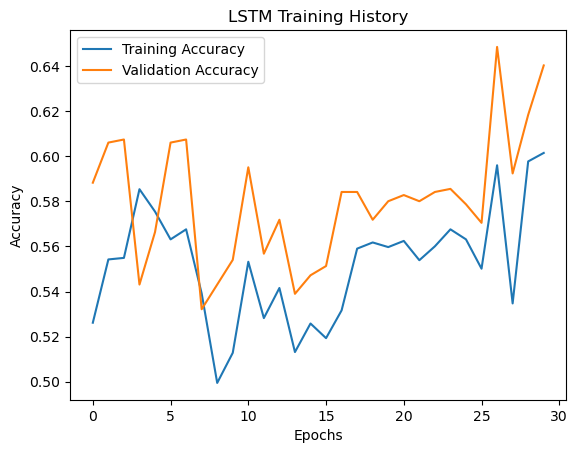

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.43      0.50       144
           1       1.00      0.01      0.02        84
           2       0.55      0.87      0.67       125
           3       0.00      0.00      0.00        41
           4       0.69      0.88      0.77       337

    accuracy                           0.64       731
   macro avg       0.57      0.44      0.39       731
weighted avg       0.65      0.64      0.57       731



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


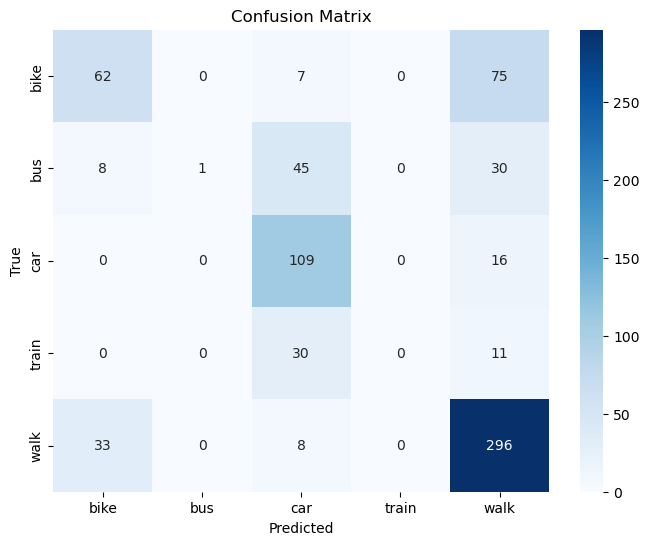

In [41]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Training History')
plt.show()

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Model with Conv2D Layer. Diqe 100 variabel machen!

In [76]:
def create_lstm_model(input_shape, num_classes):
    # Define Model
    model = Sequential()

    # 2D Convolution Layer
    model.add(Conv2D(filters=32, kernel_size=(3, 1), activation='relu', input_shape=(100, 3, 1)))

    # Flatten before LSTM
    model.add(Flatten())  # Converts 2D to 1D for LSTM compatibility

    # LSTM Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    # Fully Connected Layer
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation='softmax'))  # 7-class classification

    # Compile the Model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [77]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = y_train.shape[1]
model = create_lstm_model(input_shape, num_classes)

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 98, 3, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 9408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │     1,204,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,214,981 (4.63 MB)

 Trainable params: 1,214,981 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
# Reduce learning rate when validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[reduce_lr])

Epoch 1/50
5007/5007 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.6445 - loss: 0.9700 - val_accuracy: 0.7381 - val_loss: 0.7470 - learning_rate: 0.0010
Epoch 2/50
5007/5007 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.7295 - loss: 0.7801 - val_accuracy: 0.7529 - val_loss: 0.7028 - learning_rate: 0.0010
Epoch 3/50
5007/5007 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.7507 - loss: 0.7184 - val_accuracy: 0.7648 - val_loss: 0.6616 - learning_rate: 0.0010
Epoch 4/50
5007/5007 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.7599 - loss: 0.6968 - val_accuracy: 0.7725 - val_loss: 0.6503 - learning_rate: 0.0010
Epoch 5/50
5007/5007 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.7705 - loss: 0.6702 - val_accuracy: 0.7803 - val_loss: 0.6441 - learning_rate: 0.0010
Epoch 6/50
5007/5007 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.7717 - loss: 0.6629 - val_accuracy: 0.7769 - val_loss: 0.6441 - learning_rate: 0.0010
Epoch 7/50
5007/5007 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.7

Plot

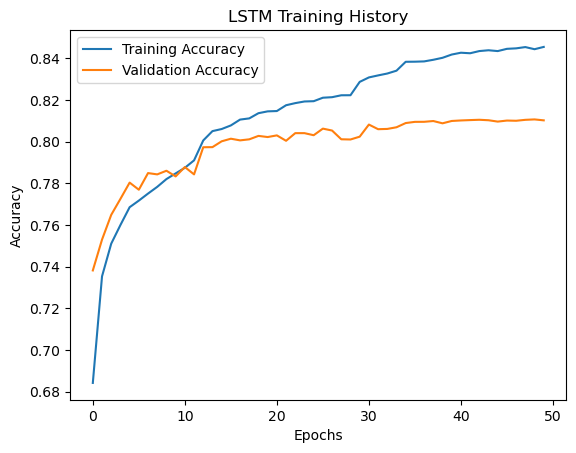

1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87     12556
           1       0.79      0.71      0.75     10899
           2       0.84      0.83      0.83     10584
           3       0.87      0.73      0.79      4224
           4       0.72      0.89      0.79     11807

    accuracy                           0.81     50070
   macro avg       0.82      0.80      0.81     50070
weighted avg       0.82      0.81      0.81     50070



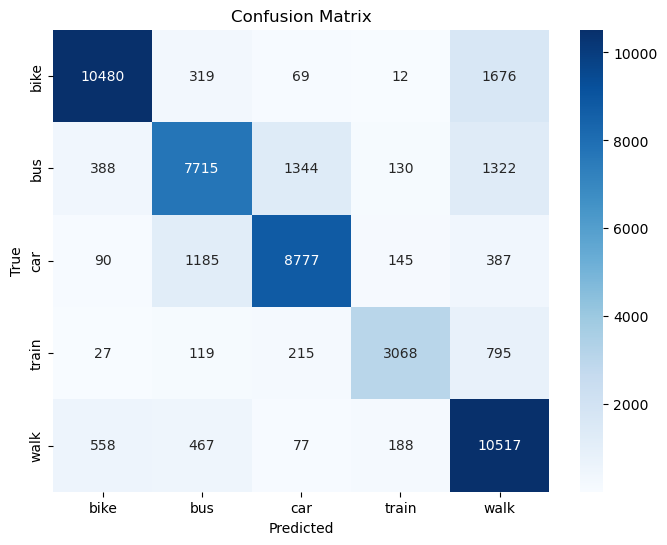

In [79]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Training History')
plt.show()

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()